In [3]:
import tensorflow as tf
from deepface import DeepFace

print(f"TensorFlow version: {tf.__version__}")

# Test DeepFace functionality
try:
    models = DeepFace.build_model("Facenet")
    print("DeepFace is working correctly!")
except Exception as e:
    print(f"Error initializing DeepFace: {e}")



TensorFlow version: 2.12.0
facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\hamza\.deepface\weights\facenet_weights.h5
100%|██████████████████████████████████████████████████████████████████████████| 92.2M/92.2M [00:03<00:00, 29.0MB/s]


DeepFace is working correctly!


In [4]:
from deepface import DeepFace

image1_path = "images/elder_man1_test.jpg"
image2_path = "images/elder_man1_test2.jpg"

verification = DeepFace.verify(image1_path, image2_path, model_name="Facenet")
print("Verification result:", verification)


1/1 [==============================] - 0s 61ms/step
Verification result: {'verified': True, 'distance': 0.2367091726586319, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


In [9]:
from deepface import DeepFace

image1_path = "images/elder_man1_test.jpg"
image2_path = "images/elder_man1_test2.jpg"

verification = DeepFace.verify(image1_path, image2_path, model_name="Facenet")
print("Verification result:", verification)

1/1 [==============================] - 0s 131ms/step
Verification result: {'verified': True, 'distance': 0.2367091726586319, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


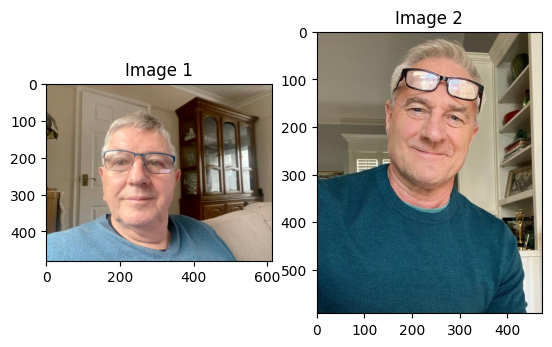

In [12]:

import cv2
import matplotlib.pyplot as plt

# Load and display the images
image1 = cv2.imread("images/elder_man1_test.jpg")
image2 = cv2.imread("images/elder_man3_test.jpg")

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")

plt.show()

In [15]:
from deepface import DeepFace

embedding = DeepFace.represent(img_path=image1_path, model_name="Facenet")
print("Face embedding:", embedding)



1/1 [==============================] - 0s 60ms/step
Face embedding: [-1.2335827350616455, -1.624121904373169, 0.05183585733175278, 1.7603141069412231, 0.48602020740509033, 0.24278759956359863, -0.6774014234542847, -1.044142246246338, -2.145442247390747, 1.0766838788986206, -2.509788990020752, -1.5650830268859863, -0.3880543112754822, 0.6532284021377563, 0.4378551244735718, -1.2049720287322998, 1.2225232124328613, -0.9110121726989746, -0.2963842749595642, -1.6970248222351074, 0.8355072736740112, -0.901370108127594, 0.22846511006355286, -0.8238720297813416, 1.1244136095046997, -1.5358123779296875, 1.1164273023605347, 1.6315960884094238, 1.2103804349899292, 1.1913708448410034, 0.44945257902145386, 1.1501153707504272, -1.5966026782989502, 0.534384548664093, -0.8069323897361755, -1.1570802927017212, -0.6162121891975403, 0.8081784248352051, -0.9868600964546204, 0.16632163524627686, 0.7440978288650513, -0.7988652586936951, 0.8097825050354004, 1.2905378341674805, 0.2647506892681122, -0.5768861

In [17]:
from keras.models import load_model

model = load_model("facenet_keras.h5")
print(model.summary())

OSError: No file or directory found at facenet_keras.h5